# Create figures for CLM land surface inputs
Plots to visualize some of the many model inputs describing land surface properties.

<span style="color:red;">This notebook requires model input data, which is automatically downloaded after creating a case through the NorESM-LSP GUI.</span>

After specifying the path to a case's `data/` folder below, run all cells in this notebook. The most convenient way is clicking the "⏩" button contained in the navigation bar at the top. It will create image files called `surface_[variable_name].png` in a folder with the given case name in this working directory - i.e., either a new folder `/notebooks/plot_input_data/[case_id]/` will appear or the files will be added to it if it already exists. Click the folder icon in the navigation bar to the left if JupyterLab currently does not display the File Browser. Feel free to adapt the code in this notebook according to your needs.

In [1]:
from pathlib import Path

# Add the full case name in quotation marks here! E.g.: "7733d6a59846cb18c051d598e968f695_alp1"
case_id = "c6f7f22a0872ca464bc471135fb69021_test2"

# Path to input data. Only change this line if you renamed the folder or moved it from the default location!
inputdata_path = Path(f"../../data/{case_id}/")

In [2]:
# Enter the case's site code in quotation marks here! E.g.: "BOR1".
# ATTENTION! This is case sensitive, use the correct capitalization of letters!
site_code = "TST2"
# If you are unsure about the site code, you can try to uncomment the next two lines instead
#import glob
#site_code = Path(glob.glob(f"../../data/{case_id}/domain*.nc")[0]).name.split("_")[2]

<span style="color: red;">Warning!</span> The following plots for soil properties assume the CLM5 default - and NorESM-LSP default - number of soil layers and their respective depths. If you customized this setting - e.g. altered the namelist values for `soil_layerstruct_userdefined`, `soil_layerstruct_userdefined_nlevsoi`, etc. - you need to adjust `default_grnd_soil_levels.json` accordingly.

_No code cells below need to be altered unless you desire custom changes._

---

In [3]:
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
# open and combine all the NetCDF files present in the folder into a dataset
surface_map_data = xr.open_mfdataset(
    f'{inputdata_path}/surfdata*.nc',
    concat_dim='time',
    combine='nested',
    decode_times=True
)

In [5]:
# Create case folder for output plots if necessary
out_dir_path = Path().absolute() / case_id

if not out_dir_path.is_dir():
    out_dir_path.mkdir(parents=True, exist_ok=True)

In [6]:
# Set general plotting options
DPI = 150
TICK_LABEL_FONT_SIZE = 12
AX_LABEL_FONT_SIZE = 14
TITLE_FONT_SIZE = 16

## Selected soil properties
Plot the volumetric fractions of sand, clay, and soil organic matter together with the observed soil depth as obtained from the global data sets described in https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/Ecosystem/CLM50_Tech_Note_Ecosystem.html#surface-characterization-vertical-discretization-and-model-input-requirements. If `use_bedock` was set to `.true.` in your simulation, this observational depth is used for hydrologic and biogeochemical calculations.

In [7]:
surface_map_data

<xarray.Dataset>
Dimensions:                  (lsmlon: 1, lsmlat: 1, time: 12, nlevsoi: 10,
                              natpft: 15, cft: 2, lsmpft: 17, numurbl: 3,
                              numrad: 2, nlevurb: 5, nglcecp1: 11, nglcec: 10)
Coordinates:
  * lsmlon                   (lsmlon) float64 227.9
  * lsmlat                   (lsmlat) float64 62.14
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlevsoi, lsmpft, numurbl, numrad, nlevurb,
                                nglcecp1, nglcec
Data variables: (12/83)
    mxsoil_color             (time, lsmlat, lsmlon) int32 dask.array<chunksize=(12, 1, 1), meta=np.ndarray>
    SOIL_COLOR               (time, lsmlat, lsmlon) int32 dask.array<chunksize=(12, 1, 1), meta=np.ndarray>
    PCT_SAND                 (time, nlevsoi, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 10, 1, 1), meta=np.ndarray>
    PCT_CLAY                 (time, nlevsoi, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 10, 1, 1), meta=np.ndarray>
    ORGANIC                  (time, nlevsoi, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 10, 1, 1), meta=np.ndarray>
    FMAX                     (time, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 1, 1), meta=np.ndarray>
    ...                       ...
    CONST_GRAZING            (time, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 1, 1), meta=np.ndarray>
    CONST_FERTNITRO_CFT      (time, cft, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 2, 1, 1), meta=np.ndarray>
    UNREPRESENTED_PFT_LULCC  (time, natpft, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 15, 1, 1), meta=np.ndarray>
    UNREPRESENTED_CFT_LULCC  (time, cft, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 2, 1, 1), meta=np.ndarray>
    lon                      (time, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 1, 1), meta=np.ndarray>
    lat                      (time, lsmlat, lsmlon) float64 dask.array<chunksize=(12, 1, 1), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                          NCAR-CSM
    Source:                               Community Land Model: CLM5
    no_inlandwet:                         TRUE
    nglcec:                               10
    Input_grid_dataset:                   map_0.25x0.25_MODIS_to_0.9x1.25_nom...
    Input_gridtype:                       global
    ...                                   ...
    Organic_matter_raw_data_file_name:    mksrf_organic_10level_5x5min_ISRIC-...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_2000.c...
    Created_on:                           2022-10-31
    Created_by:                           kavehka
    Created_with:                         ./subset_data -- 97f34c975
    Created_from:                         /cluster/shared/noresm/inputdata/ln...

In [8]:
import json
with open(Path("./dicts/default_grnd_soil_levels.json"), 'r', encoding='utf-8') as grnd_soil_json:
    grnd_soil_dict = json.load(grnd_soil_json)

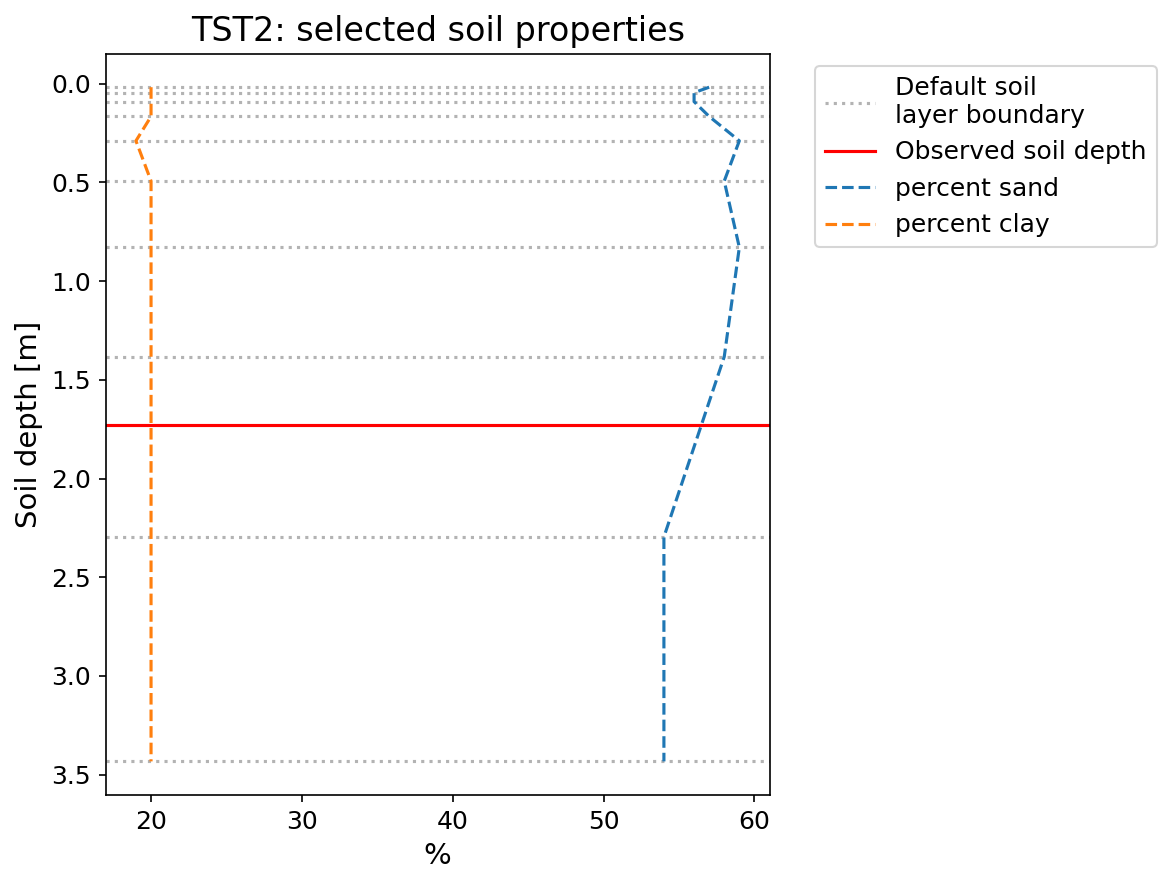

In [9]:
# Instantiate plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=DPI)

# Save plot handles from multi-line plot for easier legend manipulation
plot_handle_list = []

soil_layer_idx = [idx for idx in grnd_soil_dict["surfdata_maps"]["mksrf_soitex.10level.c010119.nc"]["soil_layer_depth"].keys()]
soil_layer_depth = [idx for idx in grnd_soil_dict["surfdata_maps"]["mksrf_soitex.10level.c010119.nc"]["soil_layer_depth"].values()]

# Add soil layers as dotted lines
for soil_layer in soil_layer_depth:
    handle = ax.axhline(soil_layer,
                        color="#69696980",
                        linestyle="dotted",
                        label="Default soil\nlayer boundary"
                       )
plot_handle_list.append(handle)

# Add observed soil depth
handle = ax.axhline(surface_map_data["zbedrock"].values[0],
                    color='r',
                    label="Observed soil depth"
                   )
plot_handle_list.append(handle)

# Plot fractions of sand and clay
properties = ("PCT_SAND", "PCT_CLAY")

for prop in properties:
    
    cur_plot_handles, = ax.plot(surface_map_data[prop].values[0].flatten(),
                                soil_layer_depth,
                                label=surface_map_data[prop].long_name,
                                linestyle="--",
                                linewidth=1.5
                               )
    
    plot_handle_list.append(cur_plot_handles)

# Set overall plot layout
ax.invert_yaxis()
ax.set_title(f"{site_code}: selected soil properties", size=TITLE_FONT_SIZE)
ax.set_xlabel("%", fontsize=AX_LABEL_FONT_SIZE)
ax.set_ylabel("Soil depth [m]", fontsize=AX_LABEL_FONT_SIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

ax.legend(
    handles=plot_handle_list,
    bbox_to_anchor=(1.05, 1),  # Places the legend outside to the plotting area
    loc='upper left',
    fontsize=TICK_LABEL_FONT_SIZE
)

fig.tight_layout()
fig.savefig(fname=f"{out_dir_path}/surface_sand_clay_pct.png", format='png')

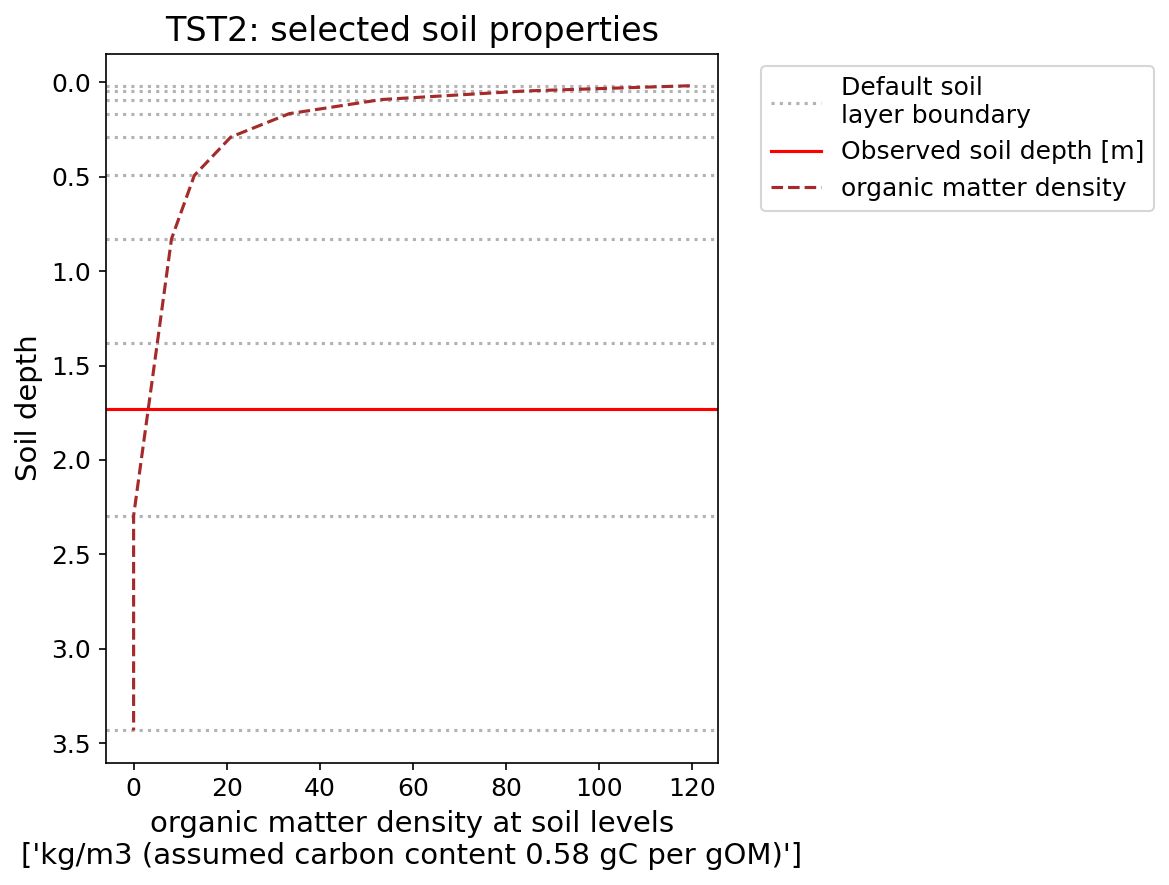

In [10]:
# Instantiate plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=DPI)

# Save plot handles from multi-line plot for easier legend manipulation
plot_handle_list = []

soil_layer_idx = [idx for idx in grnd_soil_dict["surfdata_maps"]["mksrf_soitex.10level.c010119.nc"]["soil_layer_depth"].keys()]
soil_layer_depth = [idx for idx in grnd_soil_dict["surfdata_maps"]["mksrf_soitex.10level.c010119.nc"]["soil_layer_depth"].values()]

# Add soil layers as dotted lines
for soil_layer in soil_layer_depth:
    handle = ax.axhline(soil_layer,
                        color="#69696980",
                        linestyle="dotted",
                        label="Default soil\nlayer boundary"
                       )
plot_handle_list.append(handle)

# Add observed soil depth
handle = ax.axhline(surface_map_data["zbedrock"].values[0],
                     color='r',
                     label="Observed soil depth [m]"
                    )
plot_handle_list.append(handle)

# Add soil organic matter content
handle, = ax.plot(surface_map_data["ORGANIC"].values[0].flatten(),
                  soil_layer_depth,
                  label="organic matter density",
                  color="brown",
                  linestyle="--",
                  linewidth=1.5
                  )
plot_handle_list.append(handle)

# Set overall plot layout
ax.invert_yaxis()
ax.set_title(f"{site_code}: selected soil properties", size=TITLE_FONT_SIZE)
ax.set_xlabel(f"{surface_map_data['ORGANIC'].long_name}\n{[surface_map_data['ORGANIC'].units]}", fontsize=AX_LABEL_FONT_SIZE)
ax.set_ylabel("Soil depth", fontsize=AX_LABEL_FONT_SIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

ax.legend(
    handles=plot_handle_list,
    bbox_to_anchor=(1.05, 1),  # Places the legend outside to the plotting area
    loc='upper left',
    fontsize=TICK_LABEL_FONT_SIZE
)

# Save figure
fig.tight_layout()
fig.savefig(fname=f"{out_dir_path}/surface_soil_organic_matter.png", format='png')

## Land cover fractions
From the [CLM 5 documentation](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/Ecosystem/CLM50_Tech_Note_Ecosystem.html#surface-characterization-vertical-discretization-and-model-input-requirements): 
"The first subgrid level, the land unit, is intended to capture the broadest spatial patterns of subgrid heterogeneity. The current land units are glacier, lake, urban, vegetated, and crop (when the crop model option is turned on) \[and wetlands\]. The land unit level can be used to further delineate these patterns. For example, the urban land unit is divided into density classes representing the tall building district, high density, and medium density urban areas."

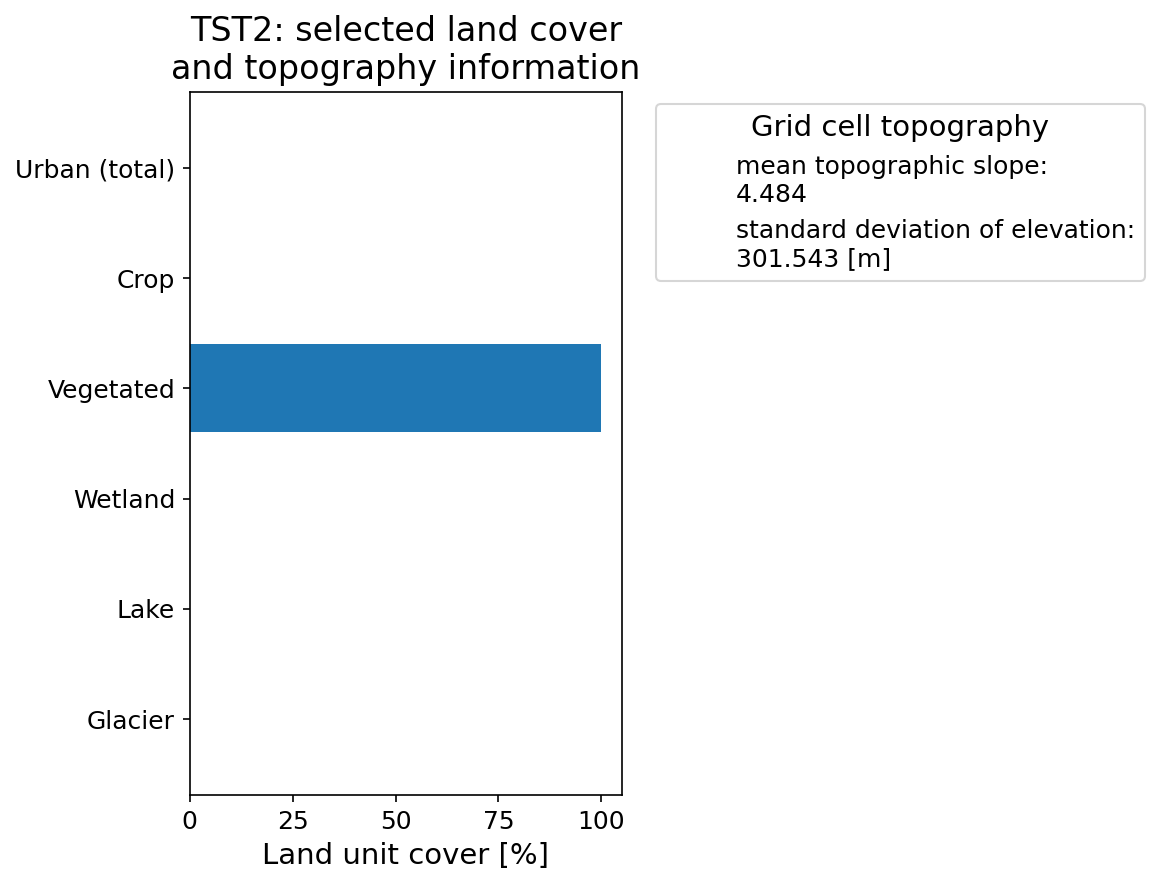

In [11]:
# Example data
lc_type = ('Glacier', 'Lake', 'Wetland', 'Vegetated', 'Crop', 'Urban (total)')
lc_var_names = ('PCT_GLACIER', 'PCT_LAKE', 'PCT_WETLAND', 'PCT_NATVEG', 'PCT_CROP')

values = [float(surface_map_data[x].values[0]) for x in lc_var_names]
values.append(float(sum(surface_map_data['PCT_URBAN'].values[0])))

# Instantiate plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=DPI)

ax.barh(y=range(len(lc_type)),
        width=values,
        align='center'
       )

# General plot options
ax.set_title(f"{site_code}: selected land cover\nand topography information", size=TITLE_FONT_SIZE)
ax.set_yticks(range(len(lc_type)), labels=lc_type)
ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)
ax.set_xlabel('Land unit cover [%]', fontsize=AX_LABEL_FONT_SIZE)

# Annotation box (in plot legend) for topography information
plot_handle_list = []
plot_handle_list.append(
    ax.axhline(0, label=f"{surface_map_data['SLOPE'].long_name}:\n{round(float(surface_map_data['SLOPE'].values[0]), 3)}",
               linewidth=0)
)
plot_handle_list.append(
    ax.axhline(0, label=f"{surface_map_data['STD_ELEV'].long_name}:\n{round(float(surface_map_data['STD_ELEV'].values[0]), 3)} [m]",
               linewidth=0)
)

plt.rcParams['legend.title_fontsize'] = AX_LABEL_FONT_SIZE
ax.legend(
    title='Grid cell topography',
    handles=plot_handle_list,
    bbox_to_anchor=(1.05, 1),  # Places the legend outside to the plotting area
    loc='upper left',
    fontsize=TICK_LABEL_FONT_SIZE
)

# Save figure
fig.tight_layout()
fig.savefig(fname=f"{out_dir_path}/surface_land_cover_and_topography.png", format='png')